# Least Squares

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

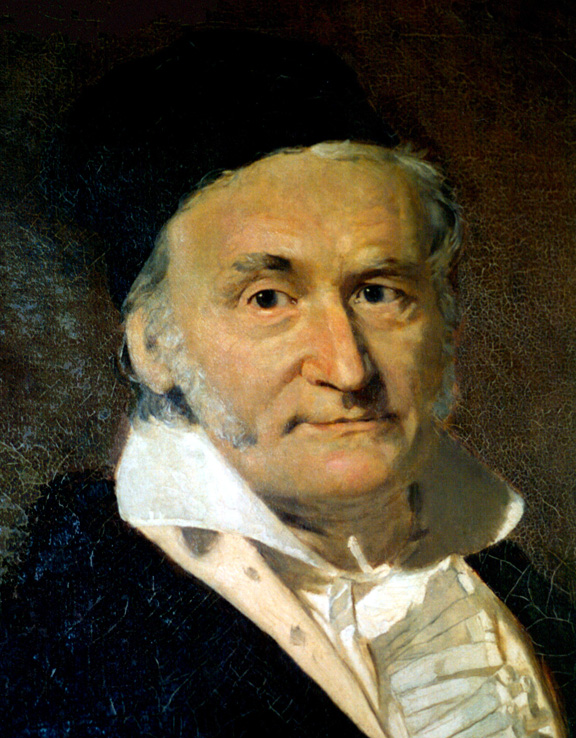

In [3]:
# image credit: http://en.wikipedia.org/wiki/Carl_Friedrich_Gauss#mediaviewer/File:Carl_Friedrich_Gauss.jpg
sl.hide_code_in_slideshow()
display(Image("images/Carl_Friedrich_Gauss.jpg", width=450))

Let's go back to week 1.  A long time ago!

Recall Gauss's remarkable accomplishment in his early 20s.  He took the set of measurements made by Piazzi of the dwarf planet Ceres and predicted where Ceres subsequently would appear in the sky (after it was lost behind the sun).  This told Olbers exactly where to look, and lo and behold . . .

We can understand now a little better what Gauss had to do.

Kepler had discovered, and Newton had explained, that each planet orbits the sun following the path of an ellipse.

To describe the orbit of Ceres, Gauss had to construct the equation for its ellipse:

$$a_1 x_1^2 + a_2 x_2^2 + a_3 x_1x_2 + a_4 x_1 + a_5 x_2 + a_6 = 0.$$

He had many measurements of $(x_1, x_2)$ pairs and had to find the $a_1, \dots, a_6.$

This is actually a linear system:

$$\mat{{cccccc}x_{11}^2 &x_{21}^2&x_{11}x_{21}&x_{11}&x_{21}&1\\x_{12}^2 &x_{22}^2&x_{12}x_{22}&x_{12}&x_{22}&1\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\x_{1n}^2 &x_{2n}^2&x_{1n}x_{2n}&x_{1n}&x_{2n}&1} \mat{{c}a_1\\a_2\\a_3\\a_4\\a_5\\a_6} = \mathbf{0}$$

Now, according to Newton, this is a consistent linear system.  The equation for the ellipse is exactly correct and all we need is six $(x_1, x_2)$ sets of measurements to know the orbit of Ceres exactly.

What could go wrong? :)

Obviously, there are going to be measurement errors in Piazzi's observations.  If we just solve the system using six measurements, we will probably get incorrect values for the coefficients $a_1, \dots, a_6.$

A better idea is to use all of the $n$ measurement data available, and try to find a way to cancel out errors.

So, using all the $n$ data measurements available, we construct a linear system:

$$ X\va = \vb$$
     
where $X$ is $n\times 6$ and $\vb \in \R^n$.

But now, due to measurement errors, we can't expect $\vb$ will lie in the column space of $X$.  We have an incosistent system. 

This system has __no solutions!__

What can we do if $A\vx = \vb$ has __no solutions?__

We now understand if $A$ is $m\times n$ and $A\vx = \vb$ has no solutions, that is because the columns of $A$ do not span $\R^m$, and $\vb$ is not in the column space of $A$.

In many cases we will be quite satisfied to find an $\vx$ that makes $A\vx$ as close as possible to $\vb.$

In other words, we are looking for an $\vx$ such that $A\vx$ makes a good __approximation__ to $\vb.$

We can think of the quality of the approximation of $A\vx$ to $\vb$ as the distance from $A\vx$ to $\vb,$ which is

$$\Vert A\vx - \vb\Vert.$$

The __general least-squares problem__ is to find an $\vx$ that makes $\Vert A\vx-\vb\Vert$ as small as possible.

This is called "least squares" because it is equivalent to minimizing $\Vert A\vx-\vb\Vert^2,$ which is the sum of squared differences.

Just to make this explicit: say that we denote $A\vx$ by $\vy$.    Then

$$\Vert A\vx-\vb\Vert^2 = \sum_i (y_i-b_i)^2$$

Where we interpret $y_i$ as the _estimated value_ and $b_i$ as the _measured value._

So this expression is the __sum of squared error.__   This is the most common measure of error used in statistics.

This is a key principle!  

__Minimizing the length of $A\vx - \vb$ is the same as minimizing the sum of squared error.__

__Definition.__ If A is $m\times n$ and $\vb$ is in $\R^m,$ a __least squares solution__ of $A\vx =\vb$ is an $\hx$ in $\R^n$ such that 

$$\Vert A\hx - \vb\Vert \leq \Vert A\vx - \vb\Vert$$

for all $\vx$ in $\R^n$.

An equivalent (and more common) way to express this is:

$$\hat{\vx} = \arg\min_\vx \Vert A\vx - \vb\Vert.$$

which emphasizes that this is a minimization problem, also called an _optimization_ problem.

__Interpretation of the Least Squares Problem.__ The point to remember is that no matter what $\vx$ is, $A\vx$ will be in the column space of $A$, $\col\ A$. 

So $\vb$ is outside $\col\ A$, and we are looking for $\vx$ that specifies the closest point in $\col\ A$ to $\vb$.

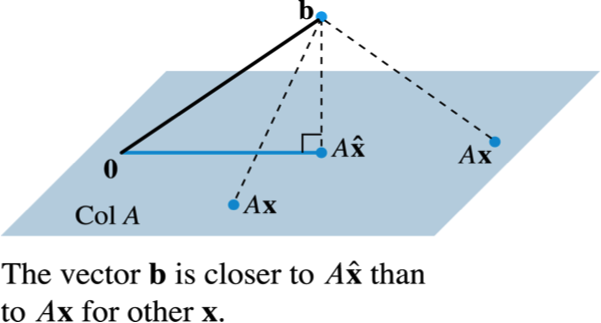

In [4]:
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-5-1.png", width=450))

__Solving the General Least Squares Problem.__

The last lecture developed methods for finding the point in a 1D subspace that is closest to a given point.   

We just need to generalize what we learned to the case of an arbitrary subspace.   This leads to two theorems: the __Orthogonal Decomposition Theorem__ and the __Best Approximation Theorem.__  

__The Orthogonal Decomposition Theorem.__ Let $W$ be a subspace of $\R^n$.  Then each $\vy$ in $\R^n$ can be written uniquely in the form 

$$ \vy = \hat{\vy} + \vz$$

where $\hat{\vy}$ is in $W$ and $\vz$ is orthogonal to every vector in $W$.

__Proof.__ In the book (straightforward).

Just as in the case of a 1D subspace (in the last lecture), we say that $\hat{\vy}$ is the __orthogonal projection of $\vy$ onto $W$__ and write $\hat{\vy} = \mbox{proj}_W \vy.$

__The Best Approximation Theorem.__  Let $W$ be a subspace of $\R^n$, let $\vy$ be any vector in $\R^n$, and let $\hat{\vy}$ be the orthogonal projection of $\vy$ onto $W$.  Then $\hat{\vy}$ is the closest point in $W$ to $\vy$, in the sense that 

$$\Vert \vy-\hat{\vy} \Vert < \Vert \vy - \vv \Vert$$

for all $\vv$ distinct from $\hat{\vy}$.

__Proof.__ 

Take $\vv$ in $W$ distinct from $\hat{\vy}$.   Here is what the setup looks like:

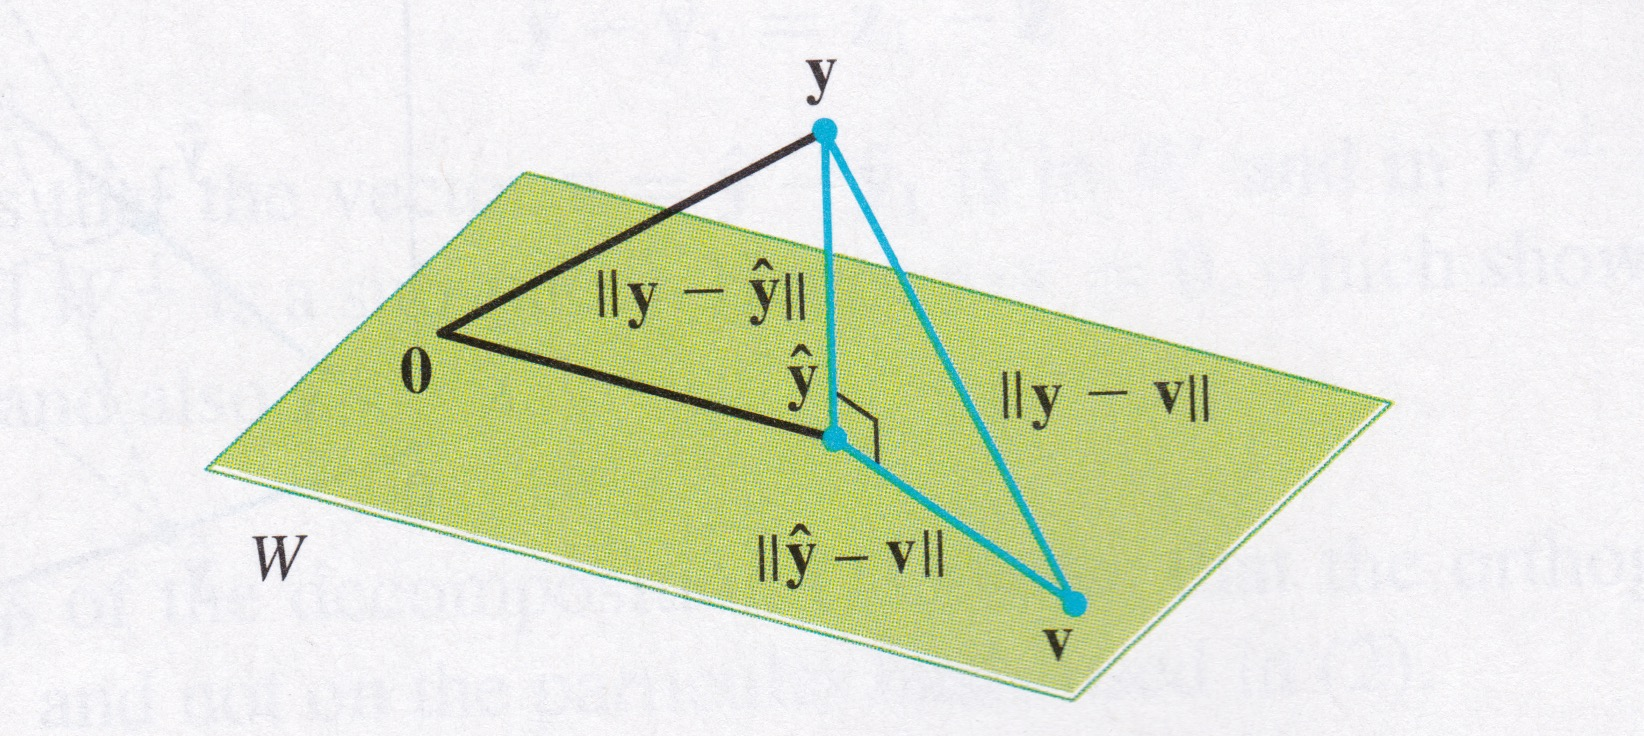

In [5]:
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-3-4.jpg", width=550))

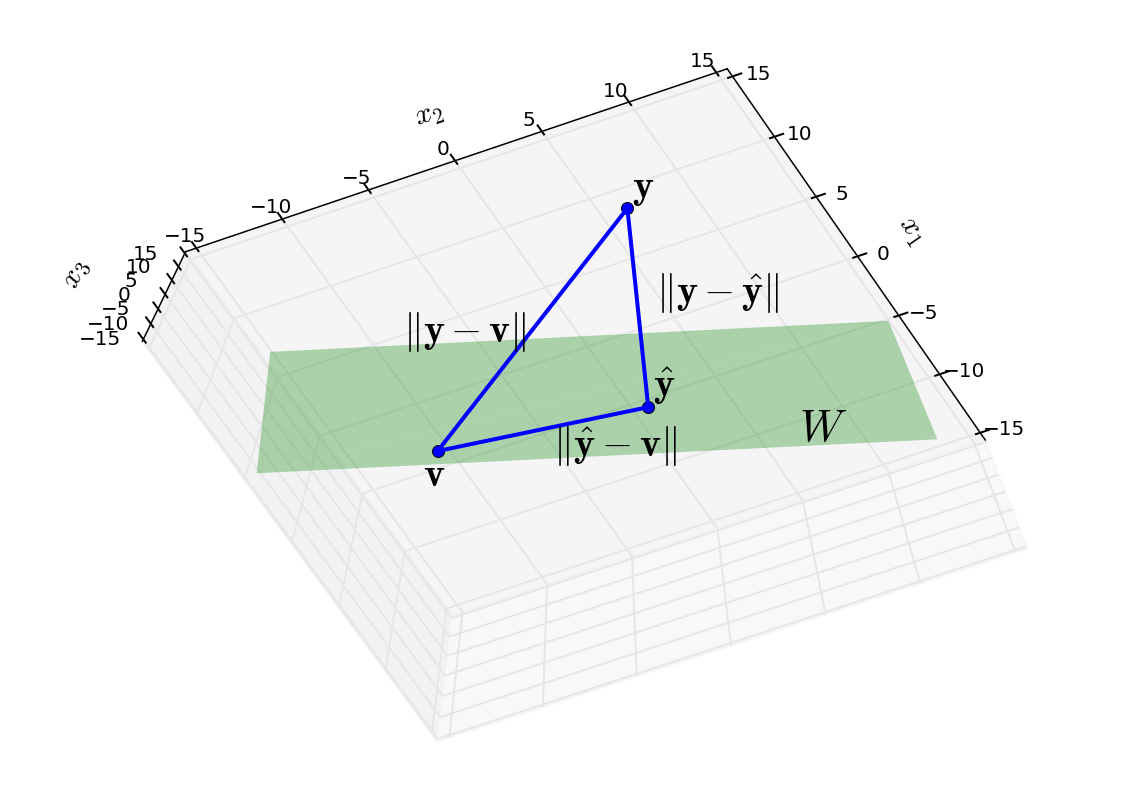

In [6]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(10,7))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
v = -3*a1 + a2
y = np.array([12.0, 8.0, -5.0])
A = np.array([a1, a2]).T
#
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
#
yhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(y)
ut.plotPoint3d(ax,yhat[0],yhat[1],yhat[2],'b')
ax.text(yhat[0]+0.5,yhat[1]+0.5,yhat[2]+0.5,r'$\mathbf{\hat{y}}$',size=20)
#
ut.plotPoint3d(ax,y[0],y[1],y[2],'b')
ax.text(y[0]+0.5,y[1]+0.5,y[2]+0.5,r'$\bf y$',size=20)
#
ut.plotPoint3d(ax,v[0],v[1],v[2],'b')
ax.text(v[0]-1.5,v[1]-1.5,v[2]-1.5,r'$\bf v$',size=20)
#
m1 = (y + v) / 2
m1 = m1 + [2,-6,0]
ax.text(m1[0],m1[1],m1[2],r'$\Vert \bf y - \bf v\Vert$',size=20)
m2 = (y + yhat) / 2
m2 = m2 + [0,1,0]
ax.text(m2[0],m2[1],m2[2],r'$\Vert \bf y - \hat{\bf y}\Vert$',size=20)
m3 = (yhat + v) / 2
m3 = m3 + [-1,0,-4]
ax.text(m3[0],m3[1],m3[2],r'$\Vert \hat{\bf y} - \bf v\Vert$',size=20)
#
wpos = -4.5*a1 
ax.text(wpos[0],wpos[1],wpos[2],r'$W$',size=22)
#
# lines
ax.plot([y[0],yhat[0]],[y[1],yhat[1]],'b-',zs=[y[2],yhat[2]],lw=2)
ax.plot([v[0],yhat[0]],[v[1],yhat[1]],'b-',zs=[v[2],yhat[2]],lw=2)
ax.plot([y[0],v[0]],[y[1],v[1]],'b-',zs=[y[2],v[2]],lw=2)
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=26.0,elev=-77.0)

Both $\hat{\vy}$ and $\vv$ are in $W$, so $\hat{\vy} - \vv$ is in $W$.  

By the orthogonal decomposition theorem, $\vy - \hat{\vy}$ is orthogonal to every vector in $W$, so it is orthogonal to $\hat{\vy} - \vv.$

Now, these three points form a (right) triangle because

$$ \vy - \vv = (\vy - \hat{\vy}) + (\hat{\vy} - \vv). $$

So the Pythagorean Theorem tells us that

$$ \Vert\vy - \vv\Vert^2 = \Vert\vy - \hat{\vy}\Vert^2 + \Vert\hat{\vy} - \vv\Vert^2. $$

Now $\hat{\vy} - \vv \neq {\bf 0}$ because $\vy$ is distinct from $\vv$.  

So 

$$\Vert \hat{\vy} - \vv \Vert > 0.$$

So 

$$ \Vert\vy - \vv\Vert^2 > \Vert\vy - \hat{\vy}\Vert^2. $$

Let's apply these ideas to solving the least squares problem:

$$\hat{\vx} = \arg\min_\vx \Vert A\vx - \vb\Vert.$$

We know that the closest point to $\vb$ in a subspace $W$ is the __projection__ of $\vb$ onto $W.$

So the point we are looking for, which we'll call $\hat{\vb},$ is:

$$\hat{\vb} = \mbox{proj}_{\col\ A} \vb$$

The key is that $\hat{\vb}$ __is__ in the column space of $A$.   So this equation is consistent, and we can solve it:

$$A\hx = \hat{\vb}.$$

Since $\hat{\vb}$ is the closest point in $\col\ A$ to $\vb,$ a vector $\hat{\vx}$ is a least-squares solution of $A\vx=\vb$ if and only if $\hx$ satisfies $A\hx = \hat{\vb}.$   

(Note: we know that $A\hx =\hat{\vb}$ is consistent (by definition), so there exists at least one solution.  However note that if $A$ has free variables -- the columns of $A$ are not independent -- then there would be many solutions of $A\hx =\hat{\vb}$.) 

Here is another picture of what we are doing:

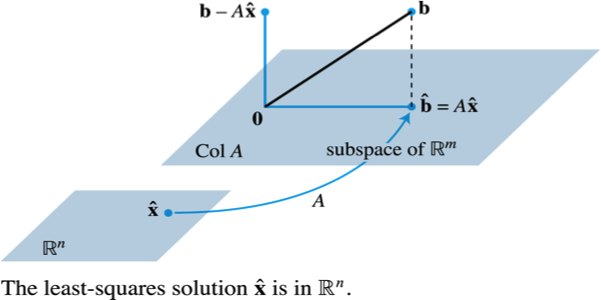

In [7]:
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-5-2.png", width=450))

Now let's look at a specific case.

Say that 

$$A = \mat{{cc}\va_1&\va_2} = \mat{{rr}1&5\\-2&-13\\3&-3}$$

and 

$$\vb = \mat{{r}6\\8\\-5}.$$

We have two columns $\va_1$ and $\va_2$ so the do not span $\R^3$.  So $\vb$ may not lie in $\col\ A$, and indeed it does not:

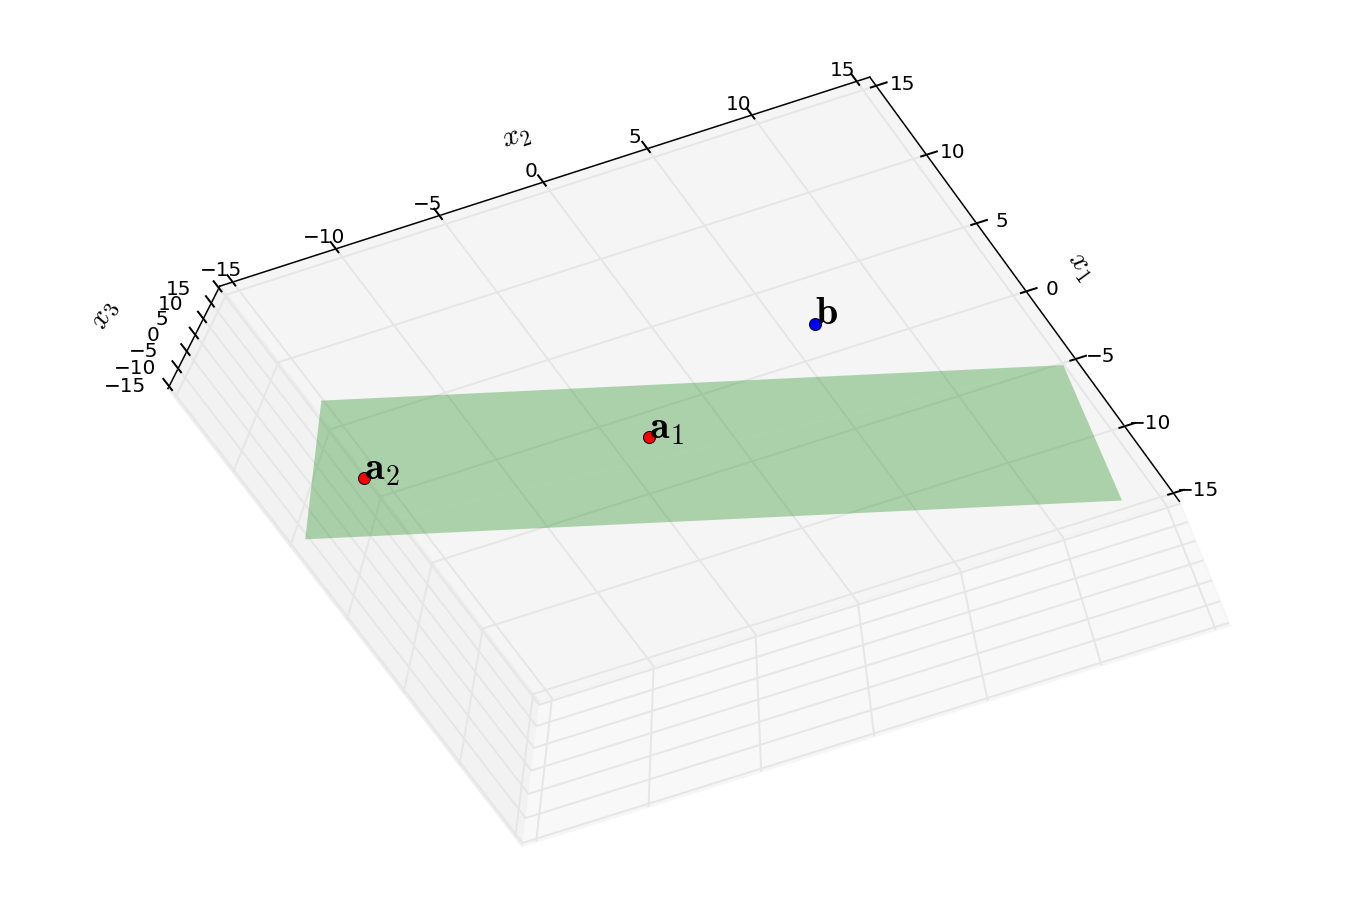

In [8]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(12,8))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
b = np.array([6.0, 8.0, -5.0])
A = np.array([a1, a2]).T
bhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(b)
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=26.0,elev=-77.0)

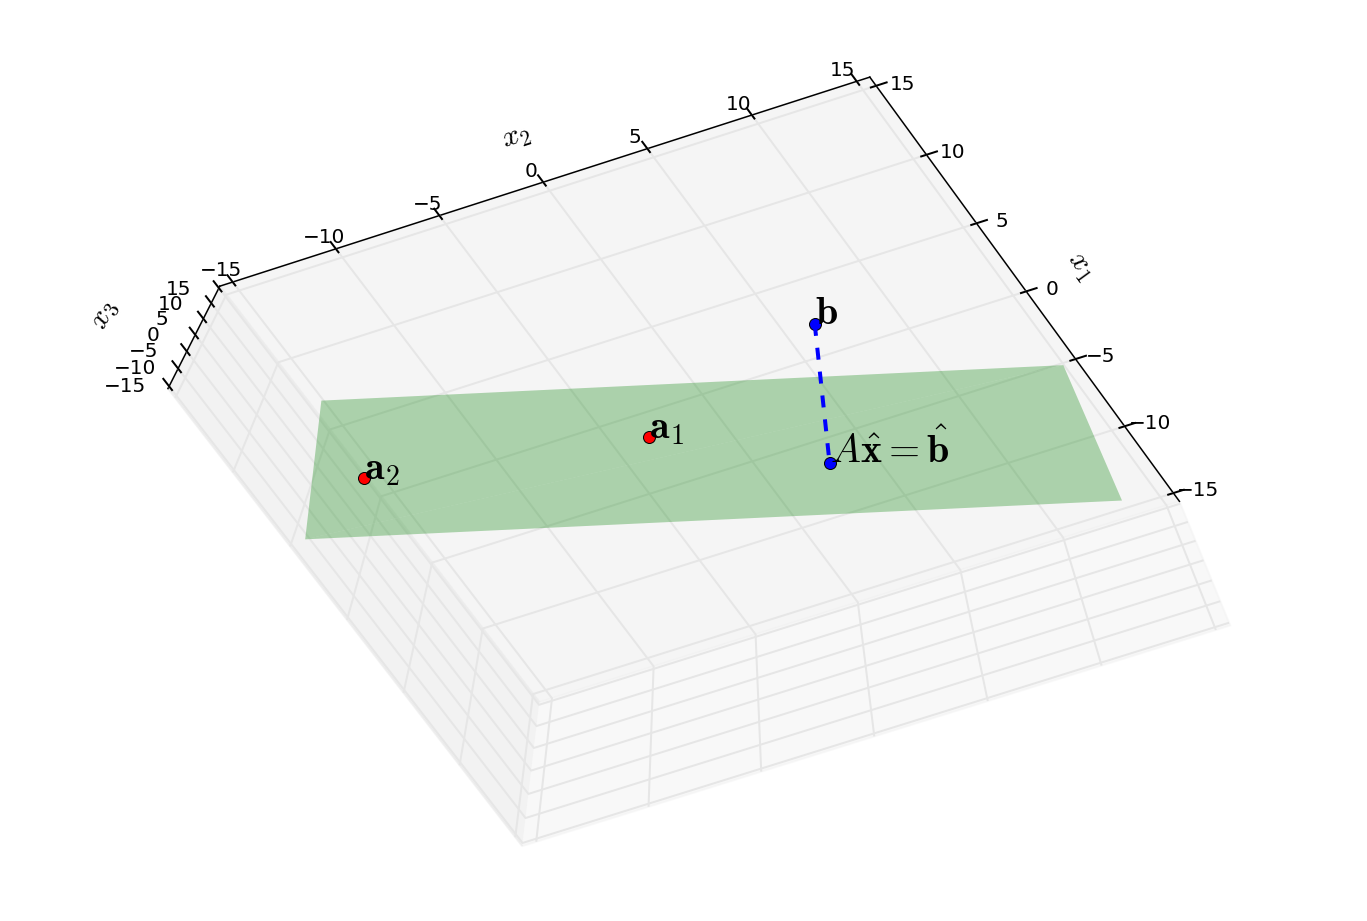

In [9]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(12,8))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
b = np.array([6.0, 8.0, -5.0])
A = np.array([a1, a2]).T
bhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(b)
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
ax.text(bhat[0],bhat[1],bhat[2],r'$A\mathbf{\hat{x}} = \mathbf{\hat{b}}$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
ut.plotPoint3d(ax,bhat[0],bhat[1],bhat[2],'b')
ax.plot([b[0],bhat[0]],[b[1],bhat[1]],'b--',zs=[b[2],bhat[2]],lw=2)
#ut.plotPoint3d(ax,0,0,0,'b')
ax.view_init(azim=26.0,elev=-77.0)

OK, how are we going to find this projection $\hat{\vb}$?

Here is the key idea: we know that the projection $\hat{\vb}$ has the property that $\hat{\vb}-\vb$ is orthogonal to $\col\ A.$

Suppose $\hat{\vb}$ is $\mbox{proj}_{\col\ A}\vb,$ and that $\hx$ satisfies $A\hx = \hat{\vb}$. 

So $A\hx - \vb$ is orthogonal to each column of $A$.   

If $\va_j$ is any column of $A$, then 

$$\va_j^T(A\hx - \vb) = 0.$$

Now, each $\va_j^T$ is a row of $A^T$.  We can collect all of the equations for all the $\va_j$ as:

$$A^T(A\hx - \vb) = {\bf 0}.$$

So

$$A^TA\hx - A^T\vb = {\bf 0}$$

So

$$A^TA\hx = A^T\vb$$

Looking at this, we see that $A^T\vb$ is a vector, and $A^TA$ is a matrix, so this is a standard linear system.  

This linear system is called the __normal equations__ for $A\vx = \vb.$

It's solution is usually denoted $\hx$.

__Theorem__  The set of least-squares solutions of $A\vx = \vb$ is equal to the (nonempty) set of solutions of the normal equations $A^TA\vx = A^T\vb.$

__Proof.__

(1) The set of solutions is nonempty.  The matrix on the left has the same column space as $A^T$ and the vector on the right is a vector in $A^T.$    

And, by the arguments above, any least-squares solution of $A\vx = \vb$ must satisfy the normal equations $A^TA\vx = A^T\vb.$

(2) Now let's show that any solution of $A^TA\vx = A^T\vb$ is a least squares solution of $A\vx = \vb$.

If $\hx$ satisfies $A^TA\vx = A^T\vb,$ then $A^T(A\hx -\vb) = {\bf 0},$ 

which shows that $A\hx - \vb$ is orthogonal to the rows of $A^T,$ and so is orthogonal to the columns of $A$.

So the vector $A\hx - \vb$ is orthogonal to $\col\ A$.

So the equation

$$\vb = A\hx - (\vb - A\hx)$$

is a decomposition of $\vb$ into the sum of a vector in $\col\ A$ and a vector orthogonal to $\col\ A$.   

Since the orthogonal decomposition is unique, $A\hx$ must tbe the orthogonal projection of $\vb$ onto the column space of $A$.

So $A\hx = \hat{\vb}$ and $\hx$ is a least-squares solution.

__Example.__  Find the least squares solution of the inconsistent system $A\vx = \vb$ for

$$A = \mat{{rr}4&0\\0&2\\1&1}, \;\;\; \vb = \mat{{r}2\\0\\11}.$$

__Solution.__

We will use the normal equations $A^TA\vx = A^T\vb.$

$$A^TA = \mat{{ccc}4&0&1\\0&2&1} \mat{{rr}4&0\\0&2\\1&1} = \mat{{rr}17&1\\1&5}$$

$$A^T\vb =  \mat{{ccc}4&0&1\\0&2&1} \mat{{r}2\\0\\11} = \mat{{r}19\\11}$$

So the normal equations are:

$$ \mat{{rr}17&1\\1&5}\mat{{c}x_1\\x_2} = \mat{{r}19\\11}$$

We can solve this using row operations, or by inverting $A^TA$.

$$(A^TA)^{-1} = \frac{1}{84}\mat{{rr}5&-1\\-1&17}$$

And we can then solve $A^TA\vx = A^T\vb$ as

$$\hx = (A^TA)^{-1}A^T\vb$$

$$ = \frac{1}{84}\mat{{rr}5&-1\\-1&17}\mat{{r}19\\11} = \frac{1}{84}\mat{{r}84\\168} = \mat{{r}1\\2}.$$

So we conclude that $\hx = \mat{{r}1\\2}$ is the vector that minimizes $\Vert A\vx -\vb\Vert.$  

__When there are multiple solutions.__

We have seen that the normal equations always have a solution.  Is there always a unique solution?

No, there can be multiple solutions that __all__ minimize $\Vert A\vx - \vb\Vert.$  

Let's remind ourselves of what is going on when a linear system has multiple solutions.

We know that a linear system has multiple solutions when there are columns that are not pivot columns.

Equivalently, whern there are multiple solutions the columns of $A$ are linearly dependent.

Here is a picture of what is going on:

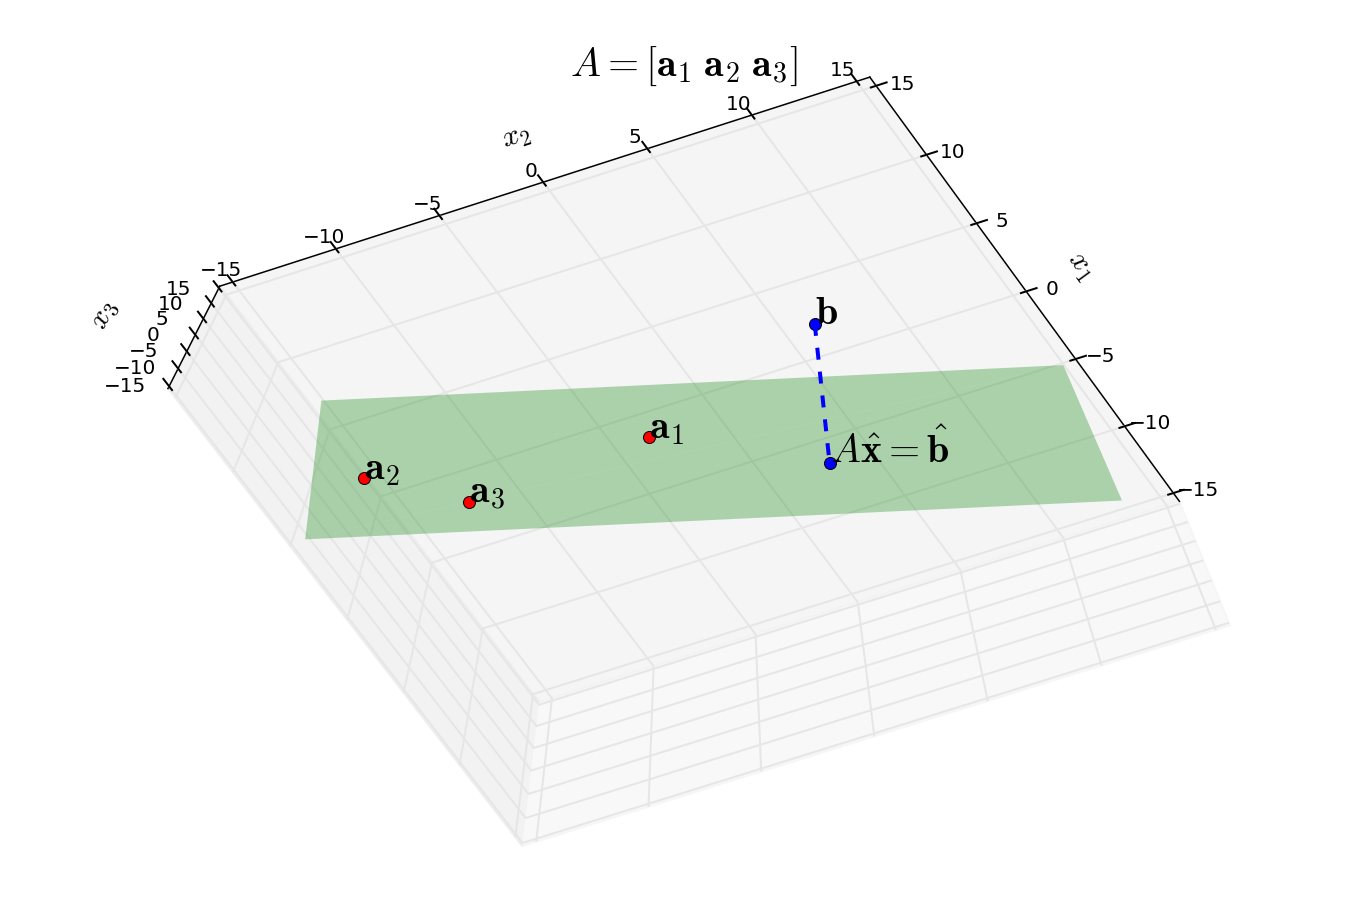

In [10]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(-15,15,-15,15,-15,15,(12,8))
a2 = np.array([5.0,-13.0,-3.0])
a1 = np.array([1,-2.0,3])
a3 = -2*a1 + a2
b = np.array([6.0, 8.0, -5.0])
A = np.array([a1, a2]).T
bhat = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T).dot(b)
ax.text(a1[0],a1[1],a1[2],r'$\bf a_1$',size=20)
ax.text(a2[0],a2[1],a2[2],r'$\bf a_2$',size=20)
ax.text(a3[0],a3[1],a3[2],r'$\bf a_3$',size=20)
ax.text(b[0],b[1],b[2],r'$\bf b$',size=20)
ax.text(bhat[0],bhat[1],bhat[2],r'$A\mathbf{\hat{x}} = \mathbf{\hat{b}}$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a,b$}',size=16)
#ax.text(0.2,0.2,-4,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,a1,a2,'Green')
ut.plotPoint3d(ax,a1[0],a1[1],a1[2],'r')
ut.plotPoint3d(ax,a2[0],a2[1],a2[2],'r')
ut.plotPoint3d(ax,a3[0],a3[1],a3[2],'r')
ut.plotPoint3d(ax,b[0],b[1],b[2],'b')
ut.plotPoint3d(ax,bhat[0],bhat[1],bhat[2],'b')
ax.plot([b[0],bhat[0]],[b[1],bhat[1]],'b--',zs=[b[2],bhat[2]],lw=2)
#ut.plotPoint3d(ax,0,0,0,'b')
plt.title(r'$A = [\mathbf{a_1}\;\mathbf{a_2}\;\mathbf{a_3}]$',size=20)
ax.view_init(azim=26.0,elev=-77.0)

__Example.__

Find a least-squares solution for $A\vx = \vb$ for

$$A = \mat{{rrrr}1&1&0&0\\1&1&0&0\\1&0&1&0\\1&0&1&0\\1&0&0&1\\1&0&0&1},\;\;\; \vb = \mat{{r}-3\\-1\\0\\2\\5\\1}.$$

__Solution.__ Compute

$$A^TA = \mat{{rrrrrr}1&1&1&1&1&1\\1&1&0&0&0&0\\0&0&1&1&0&0\\0&0&0&0&1&1}\mat{{rrrr}1&1&0&0\\1&1&0&0\\1&0&1&0\\1&0&1&0\\1&0&0&1\\1&0&0&1} = \mat{{rrrr}6&2&2&2\\2&2&0&0\\2&0&2&0\\2&0&0&2}$$

$$A^T\vb = \mat{{rrrrrr}1&1&1&1&1&1\\1&1&0&0&0&0\\0&0&1&1&0&0\\0&0&0&0&1&1}\mat{{r}-3\\-1\\0\\2\\5\\1} = \mat{{r}4\\-4\\2\\6}$$

To solve $A^TA\vx = A^T\vb,$ we'll use row reduction.  The augmented matrix $[A^TA\; A^T\vb]$ is:

$$\mat{{rrrrr}6&2&2&2&4\\2&2&0&0&-4\\2&0&2&0&2\\2&0&0&2&6} \sim \mat{{rrrrr}1&0&0&1&3\\0&1&0&-1&-5\\0&0&1&-1&-2\\0&0&0&0&0}$$

Since there is a row of zeros, we know the columns of $A^TA$ are linearly dependent.  This occurs because the columns of $A$ are linearly dependent.

The general solution is $x_1 = 3-x_4$, $x_2 = -5+x_4$, $x_3 = -2 + x_4$, and $x_4$ is free.

So the general least-squares solution of $A\vx = \vb$ has the form

$$\hx = \mat{{r}3\\-5\\-2\\0} + x_4\mat{{r}-1\\1\\1\\1}$$

Keep in mind that the orthogonal projection $\hat{\vb}$ is always unique.  

The reason that there are multiple solutions to this least squares problem is that there are __multiple ways__ to construct $\hat{\vb}$.  

The reason that there are multiple ways to construct $\hat{\vb}$ is that the columns of $A$ are linearly dependent, so __any__ vector in the column space of $A$ can be constructed in multiple ways.



Here is a theorem that allows use to identify when there are multiple least-squares solutions.

__Theorem.__  Let $A$ be an $m\times n$ matrix.  The following statements are equivalent:

1. The equation $A\vx = \vb$ has a unique least-squares solution for each $\vb$ in $\R^m.$
2. The columns of $A$ are linearly independent.
3. The matrix $A^TA$ is invertible.

When these statements are true, the least-squares solution $\hx$ is given by:

$$\hx = (A^TA)^{-1}A^T\vb$$

$$\hx = (A^TA)^{-1}A^T\vb$$

__Finding $\hat{\vb}$ directly.__

When $A^TA$ is invertible, and $\hat{\vb}$ is unique, we can put together the two equations

$$\hx = (A^TA)^{-1}A^T\vb$$

and 

$$A\hx = \hat{\vb}$$

to get:

$$\hat{\vb} = A(A^TA)^{-1}A^T\vb$$

Let's stop and look at this another way.  Up until now we have seen how to project a point onto a line, or on to a subspace with an orthogonal basis.  

Now here is a formula for projection onto a subspace space given an __arbitrary__ basis.  This is a general formula that can be very useful.